In [1]:
import warnings
warnings.filterwarnings('ignore')

통계적 유의성, $t$검정, $p$ 값 등에 대한 자료를 찾아보면, 전형적인 통계적 추론이라는 파이프라인 속에 있음을 알 수 있다.

`가설을 세운다` $\to$ `실험을 설계한다` $\to$ `데이터를 수집한다` $\to$ `추론 및 결론을 도출한다`

이 과정은 "약품 A가 기존의 표준 약품보다 낫다.", "가격 A가 기존 가격 B보다 수익성이 높다"라는 식의 가설을 세우는 것에서 출발한다. 실험은 가설을 검정하기 위해 설계되고, 원하는 최종적인 결론을 도출할 수 있도록 설계된다. 그리고 데이터를 수집하고 분석한 다음 마침내 결론을 도출한다.

<font color=red>Inference(추론</font>)은 제한된 데이터로 주어진 실험 결과를 더 큰 과정 또는 모집단에 적용하려는 의도를 반영한다.

# 1. A/B Test
A/B test는 두 가지의 처리 방법, 제품 혹은 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증하기 위해 실험군을 두 그룹(A그룹, B그룹) 으로 나누어 진행하는 실험이다.

---
- Treatment : 어떤 대상에 주어지는 특별한 환경이나 조건 (ex, 약, 가격)
- Treatment group (처리 그룹) : 특정 처리에 노출된 대상들의 집단
- Control group (대조 그룹) : 어떤 처리도 하지 않은 대상들의 집단
- Randomization (임의화 / 랜덤화) : 처리를 적용할 대상을 임의로 결정하는 과정
- Subject (대상) : 처리를 적용할 개체 대상 (피실험자)
- Test statistic (검정통계량) : 처리 효과를 측정하기 위한 지표
---

(A/B test 예제)
 - 종자 발아가 어디에서 더 잘되는지 알아보기 위해 두 가지 토양 처리를 검정한다.
 - 암을 더 효과적으로 억제하는 두 가지 치료법을 검정한다.
 - 두 가지 가격을 검정하여 더 많은 순이익을 산출하는 쪽을 결정한다. (CTR, Convsersion)
 - 두 개의 인터넷 뉴스 제목을 검정하여 더 많은 클릭을 생성하는 쪽을 결정한다.
 - 두 개의 인터넷 광고를 검정하여 어느 것이 더 높은 전환율을 얻을지 판단한다.

A/B 검정에는 둘 중 어느 한 쪽 처리를 할당할 수 있는 subject이 주어진다. Subject은 사람, 식물의 씨앗, 웹 방문자가 될 수 있다. Subject이 어떤 특청 treatment에 노출된다. Subject이 A/B treatment 중 어느 것에 노출될지는 무작위로(random) 결정된다.
이 때, 그룹간의 차이는 
- 다른 treatment의 효과
- 어떤 subject이 어떤 treatment에 배정될지에 대한 경우의 수

두 가지 이유 중 하나이다.

그룹 A와 그룹 B를 비교하는 데 사용하는 검정통계량 또는 측정 지표에 주의를 기울여야 한다. 데이터 과학에서 일반적으로 사용되는 지표는 클릭/클릭하지 않음, 구매/구매하지 않음, 사기/사기 아님 등과 같은 이진변수이다.

예를 들어, 전자 상거래 실험 결과에 대한 $2 \times 2$ 표를 살펴보자.

| 검정 결과 | 가격 A | 가격 B |
|:--------:|:--------:|:--------:|
| 전환 | 200 | 182 |
| 전환되지 않음 | 23,539 | 22,406 |

위의 예에서는 측정 지표가 binary 변수였지만, 측정 지표가 연속형 변수(구매액, 수익 등)인지 횟수를 나타내는 변수(입원 일수, 방문한 페이지 수)인지에 따라 결과가 다르게 표시될 수 있다. 위의 예의 측정 지표를 연속형 변수인 수익으로 바꾼다면 결과는 다음과 같이 나올 것이다.
- 가격 A의 페이지 뷰당 수익 : 평균 3.87, SD=51.10
- 가격 B의 페이지 뷰당 수익 : 평균 4.11, SD=62.98

주의할 것은, 모든 출력이 유용하거나 관련 있지는 않다. 표준편차를 살펴봐도, 수익이 음수가 될 수 없는다, 결과는 값들이 음수일 수 있다고 제안하고 있다. 그 이유는 수익성이 높은 페이지는 극소수이고, 대부분은 수익성이 없을 것이기 때문이다. 이처럼 데이터의 변동성은 숫자 하나로 요약한다는 것은 어렵다. 따라서, 평균절대편차도 함께 보는 것도 고려해봐야 한다.

## 대조군은 왜 필요할까?
대조군 없이 관심 있는 처리를 한 그룹에만 적용해서 실험을 하고 그 결과를 단순히 이전 경험과 비교해보면 안 될까?

대조군이 없다면 **다른 것들은 동일하다.** 는 보장이 없으며 어떤 차이가 처리(treatment) 때문인지 아니면 우연 때문인지를 확실할 수 없다. 대조군의 경우, <font color=blue>관심 처리를 뺀 나머지는 처리 그룹과 동일한 조건이 적용된다.</font> 단순히 "기준선" 또는 이전 경험과 비교할 경우, 처리 이외의 다른 요소가 다를수도 있기 때문이다.

측정 지표의 후보군은 클릭 수, 구매, 수 방문 기간, 방문한 페이지 수, 특정 페이지 방문 여부 등 다양하게 많지만 하나의 측정 지표를 사전에 정해야 한다. 여러 행동 유형과 관련된 지표들이 수집 대상이 될 수 있지만, 실험이 결국 treatment A, treatment B 사이의 결정으로 이어질 경우, 단일 지표 또는 검정 통계량을 사전에 미리 정해놓아야 한다. 만약 실험을 수행한 뒤 검정통계량 또는 측정 지표를 선택한다면 편향된 결론을 내릴 수 있다.

## 연구를 위한 눈가림
Blind study는 피실험자가 처리 A나 처리 B 중 어느 것을 받고 있는지를 알지 못하도록 하는 연구 방식이다. 특정 처리를 받는 것에 대한 인식이 반응에 영향을 줄 수 있기 때문이다. Double blind study는 조사자와 진행자(예를 들면 의사와 간호사) 모두가 어떤 대상이 어떤 처리를 받았는지 모르게 하는 연구이다. 물론 처리의 성격이 투명할 때는 눈가림 연구가 불가능하다. (예를 들어, 컴퓨터 대 심리학자로부터 받는 인지 치료의 차이와 같은 경우)

---
전통적인 의미의 통계적 실험설계는 특정 처리법의 효과에 대한 정적인 질문에 답하는 데 초점을 맞추었다. 사실, 데이터 과학자들은 이러한 질문에는 별로 관심이 없다. 

데이터 과학자에게 필요한 질문은 
 - 가격 A와 가격 B의 차이가 통계적으로 유의한가?
보다는
 - 가능한 여러 가격 중에서 가장 좋은 가격은 얼마인가?
이다.

---

# 2. 가설검정
가설 검정(hypothesis test, 유의성 검정, significance test)은 지금까지 발표된 대부분의 연구 논문에 등장하는 전통적인 통계분석 방법이다. ㅇ목적은 관찰된 효과가 우연에 의한 것인지에 대한 여부를 판단하는 것이다. 

---

- 귀무가설(null hypothesis, 영가설) : 실험의 차이는 우연 때문이라는 가설 (기존의 사실이 기본이라는 옵션)
- 대립가설(alternative hypothesis) : 귀무가설과의 대조 (증명하고자 하는 가설)
- 일원 가설검정 : 한 방향으로만 우연히 일어날 확률을 계산하는 가설검정
- 이원 가설검정 : 양방향으로 우연히 일어날 확률을 계산하는 가설검정
    
---

(근본적인 질문)

A/B검정을 계획할 때, 일반적으로 가설을 염두에 두고 한다. 예를 들면 가격 B가 더 높은 이익을 산출한다는 가설처럼 말이다. 왜 굳이 가설을 세워야 할까? 단순히 실험 결과를 보고 더 나은 치료법을 선택하면 안 될까?

이것에 대한 답은 
 - 임의성(randomness)를 과소평가하려는 인간의 경향에 있다. 즉 예외적인 사건을 예상하지 못하기 때문이다. 
 - 무작위 사건을 어떤 중요한 의미가 있는 패턴을 갖는 것으로 오해하는 경향이 있기 때문이다. 
 
통계적 가설검정은 연구자가 랜덤하게 우연히 일어난 일에 속지 않도록, 연구자를 보호하기 위한 방법으로 개발되었다.

적절하게 설계된 A/B 검정에서는, A와 B 사이의 관찰된 차이가 다음 원인들로 설명될 수 있도록 A와 B에 대한 데이터를 수집한다.
 - 우연한 대상 선정
 - A와 B의 진정한 치아
 
<font color=blue>통계 가설검정은 그룹 A와 그룹 B 사이에서 보이는 차이가 우연에 의한 것인지를 평가하기 위해 A/B 검정이나 더 나아가 그 외 여러 무작위 실험을 포함하는 분석을 의미한다.</font>

---

(랜덤성을 과소평가하려는 인간의 경향)

몇 명의 친구들에게 동전 던지기를 50번 수행하다록 부탁하자. 먼저 그들에게 임의로 앞면(H)와 뒷면(T)를 예측해서 기록하라고 하자. 그런 다음 동전을 실제로 50번 던져 나온 결과를 기록하도록 한다. 실제 동전 던진 결과와 임의로 예측한 결과 비교해보자.

어떤 결과가 진짜인지 쉽게 알 수 있다. 실제 결과에서는 H 또는 T가 연속적으로 나오는 경우가 더 길게 나타날 것이다. 실제로 동전 뒤집기를 50번 했을 때, H 또는 T가 대여섯번 연속적으로 나오는 것은 그렇게 이상한 일이 아니다. 그러나 대부분의 사람에게 랜던한 동전 던지기를 예측하라고 하면, H가 3~4번 연속으로 나온것을 보곤 무작위이기 위해서는 이제 T가 나올 차례라고 스스로에게 주문을 걸게 된다.

동전 던지기의 또 다른 측면은, H가 6번 연속으로 나오는 실제 상황을 대할 때 우리는 그것이 뭔가 의미 있고, 단순한 우연은 아닐 것이다라고 생각하는 경향이 있다는 점이다.

---


## 귀무가설
*실제로는 우연히 일어난 일이지만, 흔하지 않다는 것에 주목하고, 그것이 뭔가 의미있고 우연이 아닐 것이다라고 해석하려는 인간의 경향을 감안할 때, 실험에서 얻은 그룹 간의 차이가 랜덤을 통해 얻을 수 있는 합리적인 수준과는 더 극단적으로 달라야 한다는 증거를 보여야 한다.*

즉, <font color=blue>그룹들이 보이는 결과는 서로 동일하며 그룹간의 차이는 우연에 의한 결과라는 것</font>을 기본 가정으로 설정한다. 기존에 기본으로 사용되던 옵션이다. 이것이 귀무가설이다.

## 대립가설
실험에서 얻은 그룹 간의 차이가 랜덤하게 얻을 수 있는 합리적인 수준과는 더 극단적으로 다르다는 가설이다. 한마디로 실험에서 얻은 그룹 간의 차이는 유의미한 차이가 있다는 가설이다. 새로운 옵션을 받아드리는 것이다.

(대립가설 vs 귀무가설)
- 귀무가설 : 그룹 A와 그룹 B의 평균에는 차이가 없다.
- 대립가설 : A는 B와 다르다.(더 크거나 작을 수 있다.)


- 귀무가설 : A $\leq$ B
- 대립가설 : A > B


- 귀무가설 : B는 A보다 $x$% 더 크지 않다.
- 귀무가설 : B는 A보다 $x$% 크다.

## 일원/이원 가설검정
- 일원 가설검정
    - 새로운 옵션(대립가설)이 기존의 옵션(귀무가설)보다 완벽히 더 나은 것으로 입증되지 않은 이상, 기본 옵션을 계속 사용한다는 것이 가정이다. 이 경우에는 새로운 옵션(대립가설, B)을 선호하는 방향으로 우연에 의해 속지 않도록 가설검정을 하길 원할 것이다. 즉 B가 A보다 낫다는 것이 확실하게 증명되지 않으면 A를 계속 고수하면 된다. 이런경우에는 방향성을 고려한 대립가설이 필요하다(B는 A보다 낫다). 이 때 일원(한쪽 꼬리) 가설검정을 사용한다.
    - 우연에 의한 극단적인 결과에 대해 한 방향만을 고려하여 $p$ 값을 계산한다는 의미이다.
- 이원 가설검정
    - 일원 가설검정과는 달리, 어느 쪽으로도 속지 않도록 가설검정을 하기 위해서는 이원(양쪽 꼬리) 가설검정을 사용한다.
    - 우연에 의한 극단적인 결과가 양쪽에서 나타날 $p$ 값을 계산한다는 것을 의미한다.

새로운 옵션이 더 좋은 것으로 증명되지 않은 한 일반적으로 원래 옵션이 *기본값*으로 지정되는 상황에서는 의사 결정을 필요로 하는 A/B test의 특성상 한쪽 꼬리가 가설검정과 잘 어울린다. 하지만 여러 소프트웨어들은 일반적으로 양쪽 꼬리 검정 결과를 기본적으로 제공하며, 논쟁이 야기되는 것을 피하기 위해서 많은 통계 전문가도 보수적인 양쪽 꼬리 검정을 선택한다.

한쪽 꼬리 대 양쪽 꼬리는 아직 논란이 있는 주제이나, $p$ 값의 정확성이 그리 중요하지 않은 데이터 과학에서는 그렇게 중요하지 않다.

# 3. <font color=red>Resampling (재표본추출)</font>

Resampling(재표본추출)이란 **Random한 변동성을 찾아내려는 일반적인 목표를 가지고, 관찰된 데이터의 값에서 표본을 반복적으로 추출**하는 것을 의미한다. 또한 머신러닝 모델의 정확성을 평가하고 향상시키는 데에도 적용할 수 있다. 예를 들어, 여러 bootstrap 데이터 집합을 기반으로 하는 각각의 decision tree 모델에서 나온 예측들로부터 **bagging**이라는 절차를 통해 평균 예측값을 구할 수 있다.

Resampling에는 <font color=red>Bootstrap</font>과 <font color=red>Permutation test</font>(순열 검정)이라는 두 가지 주요 유형이 있다. Bootstrap은 추정의 신뢰성을 평가하는 데 사용된다.(Estimate or CI)

---

- Permutation test (순열검정) : 두 개 이상의 표본을(samples) 함께 결합하여 관측값들을 무작위로(또는 전부를) 재표본으로 추출하는 과정을 말한다.
- With replacement / Without replacement : 표본을 추출할 때, 이미 한번 뽑은 데이터를 다음번 추출을 위해 다시 제자리에 돌려 놓거나/다음 추출에서 제외하는 표집 방벙을 의미한다.

---

## 순열 검정 (Random Permutation Test, Randomized Test)

순열 과정에는 두 개 이상의 표본이 관여되며 이들은 통상적으로 A/B 또는 기타 가설검정을 위해 사용되는 그룹들이다. *순서를 바꾼다(permute)* 라는 의미의 영어 표현은 말 그대로 어떤 값들의 집합에서 값들의 순서를 변경한다는 의미가 있다. 순열 검정의 첫 단계는 그룹 A와 그룹 B(더 필요하다면 C, D, ...)의 결과를 하나로 합치는 것이다. 이것은 그룹들에 적용된 처리의 결과가 다르지 않다는 귀무가설을 논리적으로 구체화한 것이다. 그런 다음 결합된 집합에서 무작위로 그룹을 뽑아 그 가설을 검정하고 서로 얼마나 다른지 살펴본다.

1. 여러 그룹의 결과를 단일 데이터 집합으로 결합한다.
2. 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로 비복원 추출한다.
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 비복원 추출한다.
4. 나머지 그룹이 존재한다면, 나머지 그룹에 대해서도 동일한 작업을 수행한다.
5. 원래 샘플에 대하여 구한 통계량 또는 추정치는 무시하고 지금 추출한 재표본에 대해 새롭게 계산하고 기록한다. (순열 반복 1회)
6. 1에서 5를 R번 반복하여 검정통계량의 순열 분포를 얻는다.

실험을 통해 관찰했던 그룹 간의 차이점으로 돌아가서 순열 과정에서 얻은 집합에서의 차이와 비교해보자. 관찰된 차이가 순열로 보이는 차이의 집합 안에 잘 들어 있다면, 우리는 어떤 것도 증명할 수 없다. 즉 관찰된 차이가 우연히 일어날 수 있는 범위 안에 있다는 말이다. 하지만 관찰된 차이가 대부분의 순열 바깥에 있다면 이것은 우연 때문이 아니라고 결론 내릴 수 있다. 즉 통계적으로 유의미하다(statistically significant)고 결론 지을 수 있다.

---

*(예제 1)*

상대적으로 고가의 서비스를 제공하는 한 회사에서 두 가지 웹 디자인을 놓고 어느 쪽이 더 나은 판매 효과를 가져올지를 검증하려고 한다. 판매되는 서비스가 고가이다 보니 판매가 자주 있지 않으며 판매 주기가 상당히 길다. 실제 매출 데이터를 충분히 얻는 데는 너무 오랜 시간이 걸려, 이를 통해 웹 디자인의 우수성을 검증하기가 어렵다. 이런 이유로 이 회사는 서비스를 상세히 설명하는 내부 페이지의 이용을 대리변수로 사용하여 그 결과를 측정하기로 결정한다.

*대리 변수(proxy variable) : 참된 관심 변수를 대신하는 변수를 말한다. 이 관심 변수를 직접 얻을 수 없거나 측정하는 데 많은 비용이나 시간이 소요될 경우 이를 대체하여 사용된다. 예를 들어 기후 연구에서, 고대 빙하 중심부의 산소 함량을 당시 온도의 대체제로 사용하고 있다. 관심 가는 진짜 변수에 대한 실제 데이터가 있다면 소량이라 할지라도 유용하게 사용할 수 있다. 최소한 이를 통해 대리변수가 실제 변수를 대신해서 사용할 만한지 그 상관성이 얼마니 있는지를 평가할 수 있다.*

이 회사의 잠재적 대리 변수 중 하나는 상세한 랜딩 페이지에 대한 클릭 수이다. 더 좋은 방법은 사람들이 페이지에 머문 시간을 측정하는 것이다. 사람들의 관심을 더 오래 끌 수 있는 웹 디자인이 더 많은 매출을 만들거라고 생각하는 것은 합리적이다. 따라서 측정 지표를 페이지 A와 페이지 B에서의 평균 세션 시간을 비교하는 것으로 정할 수 있다.

특별한 목적의 내부 페이지이므로 많은 방문객을 받지는 못한다(데이터가 많지 않다는 의미). 총 36세션에 대한 정보가 있으며, 페이지 A는 21, 페이지 B는 15가 기록되었다.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

web_page_data = pd.read_csv('./inputs/web_page_data.csv')
web_page_data.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


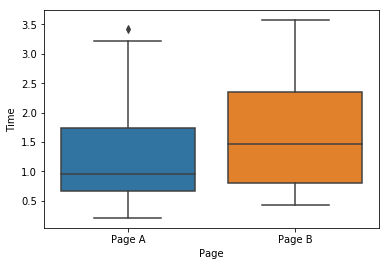

In [3]:
sns.boxplot(x='Page', y='Time', data=web_page_data)

In [4]:
# 두 그룹의 stickiness 의 평균
mean_a = web_page_data[web_page_data['Page'] == 'Page A']['Time'].mean()
mean_b = web_page_data[web_page_data['Page'] == 'Page B']['Time'].mean()

In [5]:
# 분 단위이므로 초 단위로 보기 편하게 변경
(mean_b - mean_a) * 60

21.400000000000027

검정 하려는 가설은 페이지 B의 stickness와 페이지 A의 stickness의 차이가 21.4초인데 이 차이가 우연에 의한 것인지 아니면 통계적으로 중요한 것인지를 판단하는 것이다. 순열 검정을 적용해 보자.

In [6]:
random_generator = np.random.RandomState(42)

# Permutation means
pm = []

# A 그룹의 크기
len_a = len(web_page_data[web_page_data['Page'] == 'Page A'])
# 전체 인덱스 크기
total_indice = np.arange(len(web_page_data))

for _ in range(1000):
    # 인덱스를 복사
    copy_indice = total_indice.copy()
    # 그룹에 할당할 데이터를 랜덤하게 추출하기 위해서 섞는다.
    random_generator.shuffle(copy_indice)
    perm_a = web_page_data.iloc[copy_indice[:len_a]]
    perm_b = web_page_data.iloc[copy_indice[len_a:]]
    
    pm.append((perm_b['Time'].mean() - perm_a['Time'].mean()) * 60)

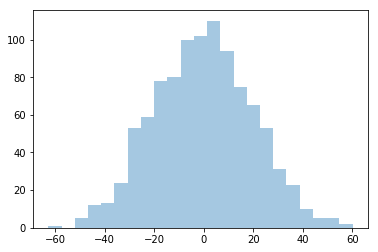

In [7]:
sns.distplot(pm, kde=False)

히스토그램을 살펴보면 무작위 순열로 구한 평균 세션 시간의 차이가, 실제 관찰된 세션 시간의 차이(21.4초)를 가끔 넘어가는 것을 볼 수 있다. 이것은 페이지 A와 B 사이의 세션 시간의 차이가 우연히 발생했다고 볼 수 있다(within the range of chance variation). 따라서 차이는 통계적으로 유의하지 않다.

---

*(예제 2)*

독일 신용데이터가 아래와 같이 주어졌다. 돈을 갚을 능력이 있는 사람(Risk:0)과 돈을 갚을 능력이 없는 사람(Risk:1)인 사람의 부채 평균을 살펴보고 싶다.

In [8]:
# German credit data를 살펴보자.
german_dataset = pd.read_csv('./inputs/german_credit_data.csv',  index_col=0)

# 데이터에는 돈을 갚을 능력(Good/Bad)에 대한 데이터가 없다. 따라서 해당 data를 concat 하도록 하겠다.
# 돈을 갚을 능력(target 변수)을 나타내는 변수를 가지고 있는 데이터를 로드한다.
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

# 데이터를 concat
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)

# 컬럼 이름 변경
german_dataset.columns.values[-1] = 'Risk'
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [9]:
mean_good = german_dataset[german_dataset['Risk'] == 0]['Credit amount'].mean()
mean_bad = german_dataset[german_dataset['Risk'] == 1]['Credit amount'].mean()

print('부채 현황 of Good:', mean_good)
print('부채 현황 of bad:', mean_bad)

부채 현황 of Good: 2985.457142857143
부채 현황 of bad: 3938.1266666666666


**(문제) 신용도가 나쁜 사람들의 부채가 신용도가 좋은 사람에 비해 평균 1,000정도가 높다고 관찰되었다. 과연 이 차이가 통계적으로 유의할까?**

---

## Exhaustive and Bootstrap Permutation Test

- Exhaustive Permutation Test : 데이터를 무작위로 섞고 나누는 대신 실제로 나눌 수 있는 모든 가능한 조합을 찾는다. 샘플 크기가 비교적 작을 때만 실용적이다. 사실 셔플링을 많이 반복하게되면 random permutation test는 exhaustive permutation test와 거의 유사하게 근접한다. 귀무가설이 어떤 유의수준 이상으로 더 유의미하다라는 다소 애매한 결론이 아닌 좀 더 정확한 결론을 보장하는 통계적 속성 때문에 정확 검정 이라고도 한다.

- Bootstrap Permutation Test : Random permutation test의 2, 3 단계에서 비복원추출을 복원추출로 변경한다. 이런 식으로 리샘플링 과정에서 모집단에서 개체를 선택할 때 임의성을 보장할 뿐만 아니라, 개체가 처리 그룹에 할당될 때에도 임의성을 보장한다(비복원추출의 경우는 앞에서 선택했던 샘플은 제외하게 되므로, 그 다음에 선택하게되는 샘플은 앞선 추출의 영향을 받게 된다).

<font color=blue>이들 사이를 구별하는 일은 다소 복잡하고, 데이터 과학의 입장에서는 별로 실용적이지 않다.</font>

## 데이터 과학 측면에서 바라본 순열 검정의 최종결론

> 순열검정은 랜덤한 변이가 어떤 역할을 하는지 알아보기 위해 사용되는 휴리스틱한 절차이다. 이는 상대적으로 코딩하고, 해석하고, 설명하기 쉽다. 

> 수학적 접근과 달리 resampling의 장점 중 하나는 추론에서 '모두에게 맞는' 접근 방식이라고 말할 수 있다. 샘플 크기는 같을 수도 다를 수도 있다. 데이터가 정규분포를 따라야 한다는 가정 또한 필요없다.

# 4. 통계적 유의성과 $p$ value
**통계적 유의성**이란, 통계학자가 자신의 실험(또는 기존 데이터에 대한 연구) 결과가 우연히 일어난 것인지 아니면 우연히 일어날 수 없는 극단적인 것인지를 판단하는 방법이다. 결과가 우연히 벌어질 수 있는 변동성의 바깥에 존재한다면 통계적으로 유의하다고 말한다.

---
- p-value : 귀무가설을 구체화한 기회 모델이 주어졌을 때, 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률
- $\alpha$(alpha) : 실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해, 우연에 의한 기회 결과가 능가해야 하는 '비정상적인' 가능성의 임계 확률
- 제 1종 오류 (type 1 error) : 우연에 의한 효과가 실제 효과라고 잘못 결론 내리는 것
- 제 2종 오류 (type 2 error) : 실제 효과를 우연에 의한 효과라고 잘못 결론 내리는 것
---

## $p$ value

예를 들어, 전자 상거래 실험 결과에 대한 $2 \times 2$ 표를 살펴보자.

| 검정 결과 | 가격 A | 가격 B |
|:--------:|:--------:|:--------:|
| 전환 | 200 | 182 |
| 전환되지 않음 | 23,539 | 22,406 |

가격 A는 가격 B에 비해 약 5% 정도 우수한 결과를 보였다. (0.8425% 대 0.8057%로, 약 0.0368% 개선) 물량이 큰 사업에서는 충분히 의미가 있는 차이이다. 

빅데이터라고 볼 수 있는 45,000개 이상의 많은 데이터를 가지고 이 결과를 얻다 보니, 통계적 유의성 검정(주로 작은 표본에서 표본의 변동성을 설명하기 위해 사용)이 필요 없다고 생각할지 모른다. 

하지만 전환율이 너무 낮아(1% 미만), 실제 필요한 표본 크기를 결정하는 데 매우 중요한 값(전환 횟수)은 정작 200개 정도에 불과하다. 

Resampling 절차를 활용하면 가격 A와 B간의 전환 차이가 우연에 의한 것인지 검정할 수 있다. 

여기서 우연에 의한 차이란 곧 두 전환율 사이에 차이가 없다는 귀무가설의 확률모형을 가지고 생성한 데이터의 ramdom variation 의미한다. 

다음 순열 절차는 "두 가격이 동일한 전환율을 공유하는지 아니면 random variation이 5% 만큼의 차이를 만들어 낼 수 있는지"를 묻는 질문에 대한 답을 준다.

1. 모든 표본 정보가 담긴 항아리가 있다고 생각해보자. 그러면 전체 전환율은 45,945개의 0과 382개의 1이므로 0.008246 = 0.8246%라고 할 수 있다.
2. 크기 23,739(가격 A)의 표본을 섞어서 뽑고 그 중 1이 몇 개인지를 기록하자.
3. 나머지 22,588개(가격 B)에서 1의 수를 기록하자.
4. 1의 비율 차이를 기록하자.
5. 2~4단계를 반복한다.
6. 이 차이가 얼마나 자주 0.0368보다 큰가?


In [10]:
# 0의 갯수 : 45,945 
# 1의 갯수 : 382
bowl = np.concatenate([np.ones(382), np.zeros(45945)])

In [11]:
perm_means = []
for _ in range(1000):
    bowl_copy = bowl.copy()
    random_generator.shuffle(bowl_copy)
    
    perm_a = bowl_copy[:23739]
    perm_b = bowl_copy[23739:]
    
    conversion_a = sum(perm_a) / len(perm_a) * 100
    conversion_b = sum(perm_b) / len(perm_b) * 100
    
    perm_means.append(conversion_a - conversion_b)

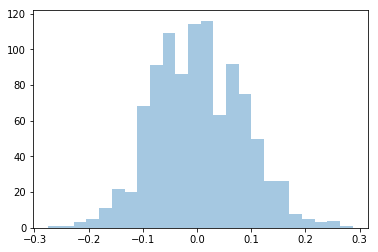

In [12]:
sns.distplot(perm_means, kde=False)

0.0368은 random variation에 존재한다. 따라서 차이는 통계적으로 유의하지 않다.

하지만 그래프를 눈으로 보기 보다는, $p$-value와 같이 통계적 유의성을 정확히 측정하기 위한 지표가 필요하다. 이것은 확률모형이 관측된 결과보다 더 극단적인 결과를 생성하는 빈도라고 할 수 있다. 다시 말해, 순열 검정으로 얻은 결과 중에서, 관찰된 차이가 같거나 더 큰 차이를 보이는 경우의 비율로 $p$ value를 추정할 수 있다.

In [13]:
perm_means = np.array(perm_means)
sum(perm_means > 0.0368) / len(perm_means)

0.322

즉 우연히 얻은 결과의 30% 정도가, 관찰값(우리가 관찰한 관찰값)과 같거나 그 이상의 극단적인 결과를 얻을 것이라고 예상할 수 있다.

전통적인 수리통계학에서의 모비율 검정으로(가설이 이항분포를 따르기 때문에), 정규분포를 이용하여 $p$ value를 근사할 수 있다. 

In [14]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([200, 182])
nobs = np.array([23739, 22588])

stat, pval = proportions_ztest(count, nobs, alternative='larger')
pval

0.33094407441560325

정규 근사법을 사용한 결과, 순열검정에서 얻은 $p$ value와 비슷한 값을 얻을 수 있다.

## $p$ value의 의미

많은 연구자가 $p$ 값이 무엇인지 어렴풋이 아는 상태로 논문이 통과될 수 있도록 유의미한 $p$ 값이 나올 때까지 온갖 가설검정을 수행한다.

진짜 문제는 사람들이 $p$ 값을 통해 실제 의미하는 것보다 더 많은 의미를 찾으려 한다는 것이다.

우리가 p 값을 통해 전달하고자 하는 의미는 **결과가 우연에서 비롯될 확률** 이다. 그래서 우리는 $p$ value가 유의수준보다 낮을 때 귀무가설을 기각하게 된다. 즉 우연에서 비롯될 확률이 낮고, 유의미한 결과가 있다고 주장하는 것이다.

하지만 실제 p 값이 나타내는 의미는 <font color=red>랜덤 모델이 주어졌을 때, 그 결과가 관찰된 결과보다 더 극단적일 확률을 의미한다</font>.

사실 이 차이가 굉장히 미묘해 보이지만, $p$ value가 유의미하다고 해서 그것이 기대처럼 바로 '증거'가 되는 것은 아니다. $p$ value를 이해하면 '통계적으로 유의미하다'는 결론에 대한 논리적 뒷받침이 다소 약하다는 것을 알게 된다.

(미국통계협회 성명서)
1. p 값은 이 데이터가 특정 모델과 얼마나 상반되는지 나타낼 수 있다.
2. p 값은 연구 가설이 사실일 확률이나, 데이터가 랜덤하게 생성되었을 확률을 측정하는 것이 아니다.
3. 과학적 결론, 비지니스나 정책 결정은 p 값이 특정 임계값을 통과하는지 여부를 기준으로 해서는 안 된다.
4. 적절한 추론을 위해서는 완전한 보고와 투명성이 요구된다.
5. p 값 또는 통계적 유의성은 효과의 크기나 결과의 중요성을 의미하지 않는다.
6. p 값 그 자체는 모델이나 가설에 대한 증거를 측정하기 위한 좋은 지표가 아니다.

## 제 1종 오류와 제 2종 오류

통계적 유의성을 평가할 때는 두 가지 유형의 오류가 발생할 수 있다.

- 1종 오류 : 어떤 효과가 우연히 발생한 것인데(귀무가설이 참인데), 그것이 사실이라고 잘못 판단하는 경우(귀무가설을 기각하는 경우)
- 2종 오류 : 어떤 효과가 실제로 있는 것인데(대립가설이 참인데), 그것이 우연히 발생한 것이라고 잘못 판단하는 경우(귀무가설을 기각하지 않는 경우)

가설 검정의 기본 기능은 어쩌다 우연히 일어난 일에 속지 않도록 하는 것이다. 따라서 보통은 1종 오류를 최소화하도록 가설을 설계한다. 하지만 이것은 비지니스 니즈에 따라서 최소화하는 오류가 바뀔 수도 있다.

## 데이터 과학과 p값?
데이터 과학자들이 하는 일은 일반적으로 과학 저널에 게재하기 위한 일은 아니다. $p$ 값의 가치에 대한 논쟁은 다소 학문적이다. 데이터 과학자에게 $p$ 값은 관심 있고 유용한 모델의 결과가 일반적인 랜덤 변이의 범위 내에 알고 싶을 때 유용한 측정 지표이다. </U>$p$ 값을 모든 실험에서 의사 결정을 좌우하는 도구로 간주해서는 안 된다.<U> $p$ 값은 어떤 결정에 관련된 정보의 일부일 뿐이다.

# 5. $t$ 검정

데이터가 횟수나 측정값을 포함하는지, 표본이 얼마나 큰지, 측정 대상이 무엇인지에 따라 다양한 유형의 유의성 검정 방법이 있다. 가장 자우 사용되는 것은 $t$ 검정이다. 

모든 유의성 검정은 관심 있는 효과를 측정하기 위한 검정통계량(관심의 차이 또는 효과에 대한 측정 지표)을 지정하고, 관찰된 효과가 정상적인 랜덤 변이의 범위 내에 있는지 여부를 판단하는 데 도움을 준다.

데이터 과학에서는 가설검정과 신뢰구간 분석을 위한 세부 사항($t$ 검정에 대한)을 익히기 위해 큰 노력을 할 필요는 없다. <font color=red>가설검정 및 신뢰구간 분석을 위해 resampling을 이용하면 된다.</font>

---
*(예시)*

Web page의 stikiness를 조사했던 과정을 다시 한 번 생각해보자.

Permutation test를 통해서 얻었던 stikiness 사이의 difference 분포 중에서, 관찰 값 21.4 보다 큰 값들의 비율을 구해보자. ($p$-value 로 사용 예정)

In [15]:
wp_pm = np.array(pm)
sum(wp_pm > 21.4) / len(wp_pm)

0.146

전통적인 $t$ test를 사용해서 $p$ value를 구해보자. Python 에서 전통적인 $t$ test는 `ttest_ind`를 사용하면 된다. 해당 메소드의 첫 번째 반환값은 통계량이고 두 번째 반환값은 $p$ value 이다.

In [16]:
rvs1 = web_page_data[web_page_data['Page'] == 'Page A']['Time'].values
rvs2 = web_page_data[web_page_data['Page'] == 'Page B']['Time'].values

from scipy import stats
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024)

해당 테스트는 2-tailed 이다. 따라서 $p$ value를 2로 나눠줘야 1-tail test의 $p$ value가 된다. 약 0.1345이다. 이 값은 permutation test를 이용하여 가설검정을 했을 때 얻어졌던 $p$ value와 많이 비슷하다.

---

# 6. 자유도
표본 데이터에서 계산된 통계량에 적용되며 변화가 가능한 값들의 개수를 의미한다. 예를 들면 10개의 값으로 이루어진 표본에서 평균과 9개 값을 알고 있다면, 마지막 10번째 값을 자연히 알 수 있다. 이 나머지 한 개의 값을 제외한 9개의 값만 변화가 가능하다.

자유도는 많은 통계 검정에서 입력으로 주어지는 값이다. 예를 들면 분산과 표준편차에 대한 계산에서 분모에 표시된 $n-1$을 자유도라고 부른다. 이것이 왜 중요할까? 표본을 통해 모집단의 분산을 추정하고자 할 때 분모에 $n$을 사용하면 추정치가 살짝 아래쪽으로 편향될 것이다. 즉 분산을 과소평가한다(underestimate). 분모에 $n-1$을 사용하면 추정값에 편향이 발생하지 않는다.

전형적인 통계 수업이나 교재의 대부분은 다양한 표준 가설검정 방법($t$ 검정, $F$ 검정 등)을 설명하는 데 많은 부분을 할애한다. 표본통계량이 전통적인 통계 공식에 맞게 표준화된 경우, 자유도는 표준화된 데이터가 그에 적합한 기준 분포($t$ 분포, $F$ 분포 등)에 맞도록 하기 위한 표준화 계산의 일부이다.

과연 이것이 데이터 과학에서도 중요할까? 적어도 유의성 검정이란 측면에서는 그렇지 않다. 첫째, 공식적인 통계 검정은 데이터 과학 분야에서 아주 드물게 사용된다. 다른 하나는 데이터 크기가 대개 충분히 크기 때문에 분모에 $n$인지, $n-1$인지 데이터 과학자에게는 거의 차이가 없다.

하지만, 관련성이 있는 영역이 하나 있다. 회귀에서 categorycal feature를 사용할 때이다(로지스틱 회귀 포함). Categorycal feature를 dummy화하여 사용할 때 자유도를 고려해야 한다. 요일을 한 번 생각해보자. 일주일에 7일이 있지만 요일을 지정할 때 자유도는 6개이다. 월요일부터 토요일이 아닌 요일은 반드시 일요일이다. 따라서 월~토요일을 사용하면, 일요일은 6개가 아닌 요일이라고 모델이 알 수 있다. 만약 일요일까지 포함한다면(자유도를 고려하지 않으면)  <font color=red>다중공선성</font> 오차로 인하여 회귀에 실패하게 된다.

# 7. 분산분석
A/B 검정 말고, 여러 그룹(예를 들어 A-B-C-D)의 수치 데이터들을 서로 비교한다고 가정해보자. 여러 그룹 간의 통계적으로 유의미한 차이를 검정하는 통계적 절차를 <font color=red>분산분석(ANOVA)</font>라고 한다.

---

- 쌍별 비교(pairwise comparison) : 여러 그룹 중 두 그룹 간의 (예를 들면 평균에 대한) 가설검정
- 총괄 검정(omnibus test) : 여러 그룹 평균들의 전체 분산에 대한 단일 가설검정
- 분산 분해(decomposition of variance) : 구성 요소 분리, 예를 들면 전체 평균, 처리 평균, 잔차 오차로부터 개별값들에 대한 기여를 뜻한다.
- F 통계량(F statistic) : 그룹 평균 간의 차이가 랜덤 모델에서 예상되는 것보다 벗어나는 정도를 측정하는 표준화된 통계량
- SS(Sum of squres) : 어떤 평균으로부터의 편차들의 제곱합

---

## Permutation test를 통한 분석

---

*(예제 1)*

Web stickiness, 즉 방문자가 페이지에서 보낸 시간을 초 단위로 보여주는 데이터를 살펴보자.

In [17]:
web_stickiness = pd.read_csv('./inputs/four_sessions.csv')
web_stickiness.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


네 개의 페이지는 무작위로 전환되며, 각 웹 방문자는 무작위로 그중 한 곳에 좁속된다. 각 페이지에는 총 5명의 방문자가 있으며 각 페이지의 데이터는 페이지별로 독립적이다. 이와 같은 웹 테스트에서는 일부 방문자를 어떤 커다란 모집단에서 무작위로 선택하는 식의, 전통적인 랜덤표본추출 디자인을 완전히 구현할 수 없다. 우리가 선택하는 것이 아니고, 방문자가 오는 대로 대상이 된다. 방문자는 시간대, 요일, 계절, 인터넷 환경, 사용하는 장치 등에 따라 체계적으로 다를 수 있다. 실험 결과를 검토할 때 이러한 요소들을 잠재적 편향의 요인으로 고려해야 한다.

단지 두 그룹을 비교하는 것이라면 문제는 단순할 것이다. 4개의 그룹에 대해서는 다음과 같이 비교를 할 것이다.
- 1페이지 vs 2페이지
- 1페이지 vs 3페이지
- 1페이지 vs 4페이지
- 2페이지 vs 3페이지
- 2페이지 vs 4페이지
- 3페이지 vs 4페이지

이처럼 개별 페이지 간의 가능한 모든 비교를 하는 대신, *모든 페이지가 동일하게 기본적인 web stickiness(점착성)을 갖는가? 그리고 이들 사이의 차이는 우연에 의한 것이고 원래 4개의 페이지에 할당된 세션 시간 역시 무작위로 할당된 것인가?* 라는 질문을 다루는 **총괄검정**을 할 수 있다.

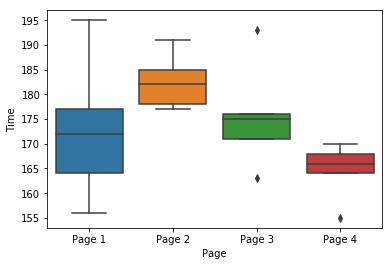

In [18]:
sns.boxplot(x='Page', y='Time', data=web_stickiness)

In [19]:
# 관찰된 결과에서 얻을 수 있는 웹 페이지 점착성 간의 변동(분산)
means = web_stickiness.groupby(['Page']).agg({'Time': np.mean})
means

,Time
Page,
Page 1,172.8
Page 2,182.6
Page 3,175.6
Page 4,164.6


In [20]:
var = means['Time'].var()
var

55.426666666666655

> Resampling(그 중에서도 permutation test)을 이용하여 ANOVA를 구해보자.
1. 모든 데이터를 한 상자에 모은다.
2. 5개의 값을 갖는 4개의 재표본을 섞어서 추출한다.
3. 각 그룹의 평균을 기록핝다.
4. 네 그룹 평균 사이의 분산을 기록한다.
5. 2~4단계를 여러 번 반복한다(예를 들면 1,000번)

재표집된 분산이 관찰된 변화를 초과하는 시간이 $p$ value이다.

In [21]:
perm_means = []
perm_vars = []

# 1. 시간을 한 상자에 모은다.
web_stickiness_values = web_stickiness['Time'].values

for _ in range(1000):    
    web_stickiness_values_copy = web_stickiness_values.copy()
    random_generator.shuffle(web_stickiness_values_copy)
    
    # 각 페이지당 5명의 방문자가 있다.
    page_a = web_stickiness_values_copy[:5]
    page_b = web_stickiness_values_copy[5:10]
    page_c = web_stickiness_values_copy[10:15]
    page_d = web_stickiness_values_copy[15:]
    
    # 각 페이지의 평균들을 모은후에 분산을 구하고 저장한다.
    # 전체집단(20개)에서 sampling을 했다. anova permutaion test를 적용하기 위해서는 자유도가 n-1이다.
    perm_vars.append(np.var([page_a.mean(), page_b.mean(), page_c.mean(), page_d.mean()], ddof=1))

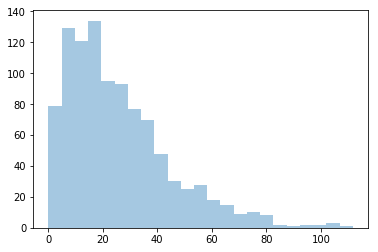

In [22]:
sns.distplot(perm_vars, kde=False)

In [23]:
# p value를 구하자.
print('관찰된 변동: ', var)

perm_vars = np.array(perm_vars)
sum(perm_vars > var) / len(perm_vars)

관찰된 변동:  55.426666666666655


0.086

순열 검정의 결과에서 관찰된 결과보다 극단적인 값이 나올 확률, 즉 random variance를 벗어날 확률인 P-value가 0.086 > 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 부족하다. 따라서 각 **웹 페이지의 체류시간이 다르다고 볼 수 있는 근거가 없다**. 

- $\text{p-value} <= \alpha$ : The differences between the means are statistically significant. We reject the null hypothesis and conclude that not all of population means are equal.
- $\text{p-value} > \alpha$ : The differences between the means are not statistically significant. We do not have enough evidence to reject the null hypothesis that the population means are all equal.



---

## $F$-통계량을 기반으로한 전통적인 방법의 ANOVA Test (일원 분산 분석)

$F$ 통계량은 잔차 오차(residual error)로 인한 분산과 그룹 평균(처리 효과)의 분산에 대한 비율을 기초로 한다. 이 비율이 높을수록 통계적으로 유의미하다고 할 수 있다. 데이터가 정규분포를 따를 경우, 통계 이론에 따르면 해당 통계량은 특정 분포를 따르게 되어 있다. 이를 토대로 $p$ 값을 계산할 수 있다.

[F 통계량을 기반으로한 ANOVA test 이론](https://nbviewer.jupyter.org/github/jeonghunyoon/machine-learning-lecture-notes/blob/master/Lecture10_Anova.pdf?flush_cache=true)

---

*(예제 1)*
##### Hypothesis
- $H_0$: 각 웹 페이지는 동일한 체류시간을 갖는다. $\mu_A=\mu_B=\mu_C=\mu_D$
- $H_1$: 다른 체류시간을 갖는 웹 페이지가 1개 이상 존재한다.

> `scipy.stats`의 `f_oneway`사용

In [24]:
page_a_time = web_stickiness[web_stickiness['Page'] == 'Page 1']['Time'].values
page_b_time = web_stickiness[web_stickiness['Page'] == 'Page 2']['Time'].values
page_c_time = web_stickiness[web_stickiness['Page'] == 'Page 3']['Time'].values
page_d_time = web_stickiness[web_stickiness['Page'] == 'Page 4']['Time'].values

In [25]:
stats.f_oneway(page_a_time, page_b_time, page_c_time, page_d_time)

F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)

> `Statsmodels` 사용

In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Time ~ Page', web_stickiness).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


Permutation test와 전통적인 ANOVA test가 비슷하게 나왔다.

- $F$ value는 $F$ 통계량을 가리킨다.  
- 처리방법 간(Page)에 대한 평균의 자유도는 3이다. (3개의 평균과 함께 총평균이 정해지면 나머지 평균은 달라질 수 없다.)
- 처리방법 내에서는 각 처리방법의 평균에서의 변동을 구하고, 그것을 모두 합한 후에 평균을 구하는 것이다. 자유도는 16이다. (각 처리방법에서는 평균과  4개의 값만 주어주면 1개의 값은 고정되기 때문에 $4\times 4$이다.)
- 처리 평균에 대한 제곱합은 각 처리 평균과 총평균 사이의 편차를 제곱한 값들의 합이다.(sum_sq)
- mean_sq는 sum_sq를 3으로 나눈 값이다.

---

---

*(예제 2)*

### Brooklyn, Bronx, Manhattan, Queens, Staten Island 지역의 SAT 평균점수별 차이가 없는지를 검정하라.
- Permutation test
- Library 사용 

두 가지 방법을 모두 구현하라.

In [27]:
pd.options.display.max_columns=None

scores = pd.read_csv('./inputs/scores.csv')
scores.head(3)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%


---

---
*(Advanced)*
## 이원 분산분석

- 그룹 A, 그룹 B, 그룹 C $\to$ 그룹 A 주말, 그룹 A 평일, 그룹 B 주말, 그룹 B 평일, 그룹 C 주말, 그룹 C 평일처럼 
- 이처럼 처리방법 내에서 그룹이 나누어져 있을 때 분산 분석을 하는 것이 **이원분산분석**이다.
- 총 평균 효과와 처리 효과를 확인한 후 각 그룹의 주말과 평일 데이터를 따로 분리한다. 그리고 그 부분집합들에 대한 평균과 처리 평균 사이의 차이를 찾아본다.

---

<font color=blue>ANOVA의 결과 중 유용한 점 중 하나는 그룹 처리, 상호작용 효과, 오차와 관련된 분산의 구성 요소들을 구분하는 데 있다.</font>

# 8. 카이제곱검정

카이제곱검정은 횟수(Count 기반) 데이터에 주로 사용되며 예상되는 분포에 얼마나 잘 맞는지를 검정한다. 통계적 관행에서 카이제곱통계량은 일반적으로 변수 간 독립성에 대한 귀무가설이 타당한지를 평가하기 위해 $r \times c$ 분할표를 함께 사용한다.

---
- 카이제곱통계량(chi-square statistic) : 기대값으로부터 어떤 관찰값까지의 거리를 나타내는 측정치
- 기댓값(expectation, expected) : 어떤 가정(보통 귀무가설)으로부터 데이터가 발생할 때, 그에 대해 기대하는 정도
- Degrees of freedom : 자유도

---

## Permutation test를 통한 분석

---

*(예제 1)*

In [28]:
headline = pd.read_csv('./inputs/click_rates.csv')
headline

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


눈으로만 살펴보면 이들 셋의 효과가 확실히 다른 것처럼 보인다. 실제 수는 적지만, A는 B에 비해 거의 2 배의 클릭을 유도했다. **Resampling을 통해, 클릭률이 우연히 발생할 수 있는 것보다 유의미한 정도로 큰 것인지를 검정할 수 있다.**

- $H_0$: 헤드라인에 따른 클릭수(클릭률)의 차이는 없다. : $\text{click rate}_{A}=\text{click rate}_{B}=\text{click rate}_{C}$
- $H_1$: 헤드라인에 따른 클릭수(클릭률)의 차이는 유의미하게 다르다.

이 검정을 하려면 클릭의 <font color=red>기대 분포</font>가 필요하며, 이 경우 각 헤드라인 모두가 동일한 클릭률을 갖는다는 가정이 귀무가설에 속한다.

In [29]:
# 클릭과 no클릭의 평균값
headline_means = headline.groupby(['Click']).agg({'Rate': np.mean})
headline_means = headline_means.reset_index()
headline_means

,Click,Rate
0,Click,11.333333
1,No-click,988.666667


In [30]:
# 컬럼 이름 Rename
headline_means = headline_means.rename(columns={'Rate':'Mean'})
headline_means

,Click,Mean
0,Click,11.333333
1,No-click,988.666667


In [31]:
merge_headline = headline.merge(headline_means, left_on='Click', right_on='Click')
merge_headline

,Headline,Click,Rate,Mean
0,Headline A,Click,14,11.333333
1,Headline B,Click,8,11.333333
2,Headline C,Click,12,11.333333
3,Headline A,No-click,986,988.666667
4,Headline B,No-click,992,988.666667
5,Headline C,No-click,988,988.666667


$$R(\text{Pearson residual 또는 잔차})=\frac{\text{관측값} - \text{기댓값}}{\sqrt{기댓값}}$$

$R$은 실제 횟수와 기대한 회수 사이의 차이를 나타낸다.

In [32]:
merge_headline['R'] = (merge_headline['Rate'] - merge_headline['Mean']) / np.sqrt(merge_headline['Mean'])
merge_headline

,Headline,Click,Rate,Mean,R
0,Headline A,Click,14,11.333333,0.792118
1,Headline B,Click,8,11.333333,-0.990148
2,Headline C,Click,12,11.333333,0.198030
3,Headline A,No-click,986,988.666667,-0.084809
4,Headline B,No-click,992,988.666667,0.106012
5,Headline C,No-click,988,988.666667,-0.021202


카이제곱통계량은 바로 이 피어슨 잔차들의 제곱합이다.
$$\chi = \sum_{i}^{r} \sum_{j}^{c} R^2$$

In [33]:
ob_chi = sum(merge_headline['R'] ** 2)
ob_chi

1.6659394708658917

관찰된 데이터에서의 카이제곱통계량은 1.66이다. *과연 이 값이 귀무가설로부터 얻을 수 있는 값보다 크다고 할 수 있을까?*

---

Resampling을 통한 카이제곱검정

1. 34개의 1(클릭), 2,966개의 0(no click)이 들어 있는 상자를 만들자.
2. 상자의 내용물을 잘 섞은 다음, 1,000개의 표본을 세 번씩 가져와서 각각의 클릭 수를 계산한다.
3. 이렇게 얻은 횟수와 기대한 횟수의 차이를 제곱해서 합산한다.
4. 2~3단계를 1,000번 반복한다. (실습 예제에서는 2,000번을 함)
5. 재표본추출을 통해 얻은 편차의 제곱합이 얼마나 자주 관측값을 초과하는가? 이것이 바로 $p$ value이다.

In [34]:
from collections import Counter

In [35]:
perm_chis = []
random_generator = np.random.RandomState(42)

# 1. 시간을 한 상자에 모은다.
clicks_rate = np.concatenate([np.ones(34), np.zeros(2966)])

for _ in range(2000):    
    clicks_rate_copy = clicks_rate.copy()
    random_generator.shuffle(clicks_rate_copy)
    
    # 2. 각 헤드라인을 무작위 추출하여 할당한다.
    headline_a = clicks_rate_copy[:1000]
    headline_b = clicks_rate_copy[1000:2000]
    headline_c = clicks_rate_copy[2000:]
    
    # 3. 각 헤드라인 별로 click과 no click을 구한다.
    """
    no_click_a = Counter(headline_a).most_common()[0][1]
    click_a = Counter(headline_a).most_common()[1][1]
    이렇게 짜는 것이 더 편하다. 이해가 어렵다면 아래의 코드로 짜자.
    """
    click_a = sum(headline_a)
    no_click_a = len(headline_a) - click_a
    click_b = sum(headline_b)
    no_click_b = len(headline_b) - click_b
    click_c = sum(headline_c)
    no_click_c = len(headline_c) - click_c
    
    # 4. Click, no-click의 기대값, 그리고 피어스만 residual를 구한다.
    clicks = np.array([click_a, click_b, click_c])
    no_clicks = np.array([no_click_a, no_click_b, no_click_c])
    clicks_mean = clicks.mean()
    no_clicks_mean = no_clicks.mean()
    click_res = (clicks - clicks_mean) / np.sqrt(clicks_mean)
    no_click_res = (no_clicks - no_clicks_mean) / np.sqrt(no_clicks_mean)
    
    # 5. Permutation의 카이제곱통계량을 구한다.
    chi = sum(click_res ** 2 + no_click_res ** 2)
    
    # 각 페이지의 평균들을 모은후에 분산을 구하고 저장한다.
    # 전체집단(20개)에서 sampling을 했다. anova permutaion test를 적용하기 위해서는 자유도가 n-1이다.
    perm_chis.append(chi)

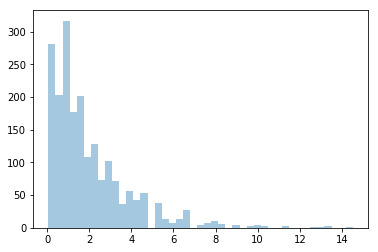

In [36]:
sns.distplot(perm_chis, kde=False)

In [37]:
sum(np.array(perm_chis) > ob_chi) / len(perm_chis)

0.41

$p$ value는 permutation test의 결과중에서 관찰된 카이제곱통계량보다 큰 값들의 비율을 의미하고, 그 비율이 0.41이기 때문이다. 즉 관찰된 클릭률의 차이는 귀무가설하에서(즉 클릭률이 차이가 없다라는 가정하에서) 얼마든지 얻을 수 있는 결과라고 판단할 수 있다. 즉 헤드라인별 클릭률 차이가 유의미하다고 결론지을 근거가 없다.

## 카이제곱통계량의 분포의 asymptotic를 이용한 분석

점근적(asymtotic) 통계 이론은 카이제곱 통계량의 분포가 카이제곱분포로 근사화 될 수 있음을 보여준다. 

Python에서는 `scipy.stats`의 `chi2_contingency`를 이용하여 검정을 수행할 수 있다.

In [38]:
# 헤드라인 데이터를 numpy array로 바꾸어 인풋을 만든다.
obs = headline.Rate.reshape((3, 2)).T

In [39]:
# 1.6659394708658917 : 검정통계량, 0.4347562562343731 : p-value, 2 : degree of freedom
stats.chi2_contingency(obs)

(1.6659394708658917,
 0.4347562562343731,
 2,
 array([[ 11.33333333,  11.33333333,  11.33333333],
        [988.66666667, 988.66666667, 988.66666667]]))

$p$ value가 0.43이며, 역시 귀무가설을 기각할 수 없다.

---

*(예제 2)*

### 독일 신용 평가 데이터이다. 집 소유 상태(Housing)에 따라서 부채를 상환했는지(Risk : 0) 상환하지 못했는지(Risk : 1)의 에 대한 관련성을 알아보려 한다. 이를 위해, 집 소유 상태에 따른 부채 상환여부 비율을 비교하고자 한다. 부채 상환비율에는 집 소유 상태가 관련이 있는지 없는지 검정하라.

In [40]:
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


- Permutation test를 사용
- Python library와 비교

---

---
(Advanced)

사건 발생 횟수가 매우 낮을 때는 Fisher의 정확검정을 사용하면 된다.

---

데이터 과학 응용 분야에서는 카이제곱검정(구현은 permutation test를 이용하면 된다)을 **필터**로서 많이 사용한다.
- 공간 통계학에서는 공간 데이터가 귀무가설 분포를 따르는지 여부를 결정하는데에 사용된다. (즉, 랜덤인 경우보다 특정 영역에 범죄가 집중되고 있는지를 결정)
- 머신러닝 영역에서는 <font color=red>자동으로 특징을 선택하기 위해 사용된다</font>. 특징에 따라 클래스 분포가 어떠한지 조사하고, 특정 클래스의 분포가 랜덤 변이에 비해 비정상적으로 크거나 작은 특징을 알아내는 등에 사용한다.

사실 전형적인 통계 추론 주제들, 즉 가설검정, $p$ 값, $t$ 검정 등 같은 주제들은 기존의 통계 강의나 참고자료에서 가장 많은 시간과 공간을 차지한다. 데이터 과학의 입장에서 보면 이런 기존의 틀은 거의 필요하지 않다. **데이터 과학자들은 직관적인 Permutation test, Bootstrap을 통해 데이터 분석에서 우연에 의한 variation이 어느 정도까지 영향을 미치는지(variation의 분포로 접근을 할 수 있으므로) 측정할 수 있게 되었다.**